#**Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

> # **Same preprocessing steps as task1**

In [ ]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
loans = pd.read_csv('train_set.csv')

In [ ]:
loans.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
loans.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
loans.shape

(252000, 13)

In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [ ]:
loans.shape

(252000, 13)

In [ ]:
loans.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
loans.duplicated().sum()

0

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(loans, loans['Risk_Flag']):
  strat_train_set = loans.loc[train_index]
  strat_valid_set = loans.loc[valid_index]

In [ ]:
strat_train_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
13714,13715,8132252,72,7,single,rented,no,Mechanical_engineer,Karaikudi,Tamil_Nadu,6,13,0
51718,51719,7915651,64,8,single,rented,no,Psychologist,Jamnagar,Gujarat,3,12,0
99982,99983,6272029,49,12,single,rented,no,Drafter,Sagar,Madhya_Pradesh,7,10,0
107150,107151,1832125,54,13,single,rented,yes,Scientist,Vijayanagaram,Andhra_Pradesh,12,14,0
94564,94565,7954133,31,7,single,rented,yes,Drafter,Avadi,Tamil_Nadu,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197799,197800,5144485,55,4,single,rented,no,Secretary,Chapra,Bihar,4,13,0
228682,228683,9031799,49,5,single,rented,no,Architect,Bhimavaram,Andhra_Pradesh,4,10,0
114068,114069,1585215,64,9,single,rented,no,Politician,Karnal,Haryana,9,10,0
200681,200682,4784462,60,19,married,rented,yes,Economist,Durg,Chhattisgarh,9,14,0


In [ ]:
strat_valid_set

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
73540,73541,1695876,58,6,single,rented,yes,Computer_hardware_engineer,Bhalswa_Jahangir_Pur,Delhi,6,13,0
106484,106485,3423010,74,3,single,rented,yes,Computer_hardware_engineer,Dehradun,Uttarakhand,3,10,0
164137,164138,9685641,63,5,single,rented,no,Psychologist,Tadipatri,Andhra_Pradesh,5,12,0
36524,36525,4806341,79,3,single,rented,no,Computer_operator,Panchkula,Haryana,3,13,0
233388,233389,195009,79,15,single,rented,yes,Librarian,Morbi,Gujarat,4,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174885,174886,8129321,22,16,single,rented,no,Physician,Thiruvananthapuram,Kerala,13,12,0
203158,203159,1839079,43,11,married,rented,no,Aviator,Bhubaneswar,Odisha,10,11,0
234667,234668,2606288,51,6,single,rented,no,Architect,Malegaon,Maharashtra,6,13,0
30812,30813,78418,35,18,single,rented,no,Air_traffic_controller,Bathinda,Punjab,12,12,0


In [ ]:
Counter(strat_train_set.Risk_Flag)

Counter({0: 176803, 1: 24797})

In [ ]:
Counter(strat_valid_set.Risk_Flag)

Counter({0: 44201, 1: 6199})

In [ ]:
strat_train_set.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
strat_train_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)

In [ ]:
for col in strat_train_set.select_dtypes('object').columns:
  print(strat_train_set[col].value_counts())
  print()

single     181079
married     20521
Name: Married/Single, dtype: int64

rented          185484
owned            10372
norent_noown      5744
Name: House_Ownership, dtype: int64

no     141131
yes     60469
Name: Car_Ownership, dtype: int64



In [ ]:
X = strat_train_set[strat_train_set.columns.difference(['Risk_Flag'])]
y = strat_train_set.Risk_Flag

In [ ]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
X_over, y_over = over.fit_resample(X, y)

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)

print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Combined Random Sampling: Counter({0: 110501, 1: 88401})


In [ ]:
strat_train_set = pd.DataFrame(np.c_[X_combined_sampling, y_combined_sampling], columns=list(X.columns) + ['Risk_Flag'])

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,79,13,3,no,17,rented,8344425,single,0
1,62,11,3,yes,3,rented,3310900,single,0
2,76,12,3,no,11,rented,3416887,single,0
3,22,11,2,no,2,rented,2489299,single,0
4,25,14,6,yes,12,rented,4614386,single,0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  object
 1   CURRENT_HOUSE_YRS  198902 non-null  object
 2   CURRENT_JOB_YRS    198902 non-null  object
 3   Car_Ownership      198902 non-null  object
 4   Experience         198902 non-null  object
 5   House_Ownership    198902 non-null  object
 6   Income             198902 non-null  object
 7   Married/Single     198902 non-null  object
 8   Risk_Flag          198902 non-null  object
dtypes: object(9)
memory usage: 13.7+ MB


In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198902 entries, 0 to 198901
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                198902 non-null  Int64 
 1   CURRENT_HOUSE_YRS  198902 non-null  Int64 
 2   CURRENT_JOB_YRS    198902 non-null  Int64 
 3   Car_Ownership      198902 non-null  string
 4   Experience         198902 non-null  Int64 
 5   House_Ownership    198902 non-null  string
 6   Income             198902 non-null  Int64 
 7   Married/Single     198902 non-null  string
 8   Risk_Flag          198902 non-null  Int64 
dtypes: Int64(6), string(3)
memory usage: 14.8 MB


In [ ]:
# for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns):
#   sns.set_style("darkgrid")
#   sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#   plt.figure(i, figsize=(8,5))
#   _ = sns.histplot(data=strat_train_set[col], shrink=.8)

In [ ]:
# for i, col in enumerate(strat_train_set.select_dtypes(exclude='string').columns.difference(['Income'])):
#   sns.set_style("darkgrid")
#   sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
#   plt.figure(i, figsize=(8,5))
#   _ = sns.scatterplot(data=strat_train_set, x=col, y='Income', hue='Risk_Flag', alpha=0.4)

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag
0,79,13,3,no,17,rented,8344425,single,0
1,62,11,3,yes,3,rented,3310900,single,0
2,76,12,3,no,11,rented,3416887,single,0
3,22,11,2,no,2,rented,2489299,single,0
4,25,14,6,yes,12,rented,4614386,single,0


In [ ]:
# # scaling dataset now just for better visualization
# temp_scaler = StandardScaler()
# scaled_df = pd.DataFrame(temp_scaler.fit_transform(strat_train_set.copy().select_dtypes(exclude='string')), columns=strat_train_set.select_dtypes(exclude='string').columns)


# plt.figure(figsize=(15,9))
# _ = sns.boxplot(data=scaled_df, width=0.5, orient='h')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Experience'])

0

In [ ]:
np.sum(strat_train_set['CURRENT_JOB_YRS'] > strat_train_set['Age'])

0

In [ ]:
np.sum(strat_train_set['CURRENT_HOUSE_YRS'] > strat_train_set['Age'])

0

In [ ]:
np.sum(strat_train_set['Experience'] > strat_train_set['Age'])

0

In [ ]:
np.sum((strat_train_set['Age'] - strat_train_set['Experience']) < 14)

15632

In [ ]:
len(strat_train_set)

198902

In [ ]:
198902 - 15501

183401

In [ ]:
strat_train_set.drop(strat_train_set[(strat_train_set['Age'] - strat_train_set['Experience']) < 14].index, inplace=True)

len(strat_train_set)

183270

In [ ]:
# strat_train_set["Income_cats"] = pd.cut(strat_train_set["Income"],
# bins=np.array([0., .25, .5, .75, 1.])*1e7,
# labels=['income_low', 'income_avg', 'income_high', 'income_very_high']).astype('string')

In [ ]:
def age(row):
    if row['Age'] >= 19 and row['Age'] < 30:
        val = 'age_cat_one'
    elif row['Age'] >= 30 and row['Age'] < 45:
        val = 'age_cat_two'
    elif row['Age'] >= 45 and row['Age'] < 65:
        val = 'age_cat_three'
    else:
        val = 'age_cat_four'
    
    return val

########################################################

def exp(row):
    if row['Experience'] <= 5:
        val = 'exp_cat_one'
    elif row['Experience'] >= 6 and row['Experience'] <= 10:
        val = 'exp_cat_two'
    elif row['Experience'] >= 11 and row['Experience'] <= 15:
        val = 'exp_cat_three'
    else:
        val = 'exp_cat_four'
    
    return val

In [ ]:
strat_train_set['Age_cats'] = strat_train_set.apply(age, axis=1)
strat_train_set['Exp_cats'] = strat_train_set.apply(exp, axis=1)

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Car_Ownership,Experience,House_Ownership,Income,Married/Single,Risk_Flag,Age_cats,Exp_cats
0,79,13,3,no,17,rented,8344425,single,0,age_cat_four,exp_cat_four
1,62,11,3,yes,3,rented,3310900,single,0,age_cat_three,exp_cat_one
2,76,12,3,no,11,rented,3416887,single,0,age_cat_four,exp_cat_three
3,22,11,2,no,2,rented,2489299,single,0,age_cat_one,exp_cat_one
5,66,13,0,no,0,rented,204151,single,0,age_cat_four,exp_cat_one


In [ ]:
# strat_train_set.Income_cats.value_counts()

In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183270 entries, 0 to 198901
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Age                183270 non-null  Int64 
 1   CURRENT_HOUSE_YRS  183270 non-null  Int64 
 2   CURRENT_JOB_YRS    183270 non-null  Int64 
 3   Car_Ownership      183270 non-null  string
 4   Experience         183270 non-null  Int64 
 5   House_Ownership    183270 non-null  string
 6   Income             183270 non-null  Int64 
 7   Married/Single     183270 non-null  string
 8   Risk_Flag          183270 non-null  Int64 
 9   Age_cats           183270 non-null  string
 10  Exp_cats           183270 non-null  string
dtypes: Int64(6), string(5)
memory usage: 17.8 MB


In [ ]:
strat_train_set_cats = strat_train_set.select_dtypes('string')

In [ ]:
cat_encoder = OneHotEncoder()
strat_train_set_cats_1hot = cat_encoder.fit_transform(strat_train_set_cats)

In [ ]:
cat_encoder.get_feature_names()

array(['x0_no', 'x0_yes', 'x1_norent_noown', 'x1_owned', 'x1_rented',
       'x2_married', 'x2_single', 'x3_age_cat_four', 'x3_age_cat_one',
       'x3_age_cat_three', 'x3_age_cat_two', 'x4_exp_cat_four',
       'x4_exp_cat_one', 'x4_exp_cat_three', 'x4_exp_cat_two'],
      dtype=object)

In [ ]:
strat_train_set_cats_1hot = pd.DataFrame(strat_train_set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

In [ ]:
strat_train_set_cats_1hot.head()

,x0_no,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_married,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0


In [ ]:
strat_train_set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

In [ ]:
strat_train_set_cats_1hot.head()

,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,0,0,0,1,1,1,0,0,0,1,0,0,0
1,1,0,0,1,1,0,0,1,0,0,1,0,0
2,0,0,0,1,1,1,0,0,0,0,0,1,0
3,0,0,0,1,1,0,1,0,0,0,1,0,0
4,0,0,0,1,1,1,0,0,0,0,1,0,0


In [ ]:
strat_train_set.drop(strat_train_set_cats.columns, axis=1, inplace=True)

In [ ]:
strat_train_set = pd.DataFrame(np.c_[strat_train_set, strat_train_set_cats_1hot], columns=list(strat_train_set.columns) + list(strat_train_set_cats_1hot.columns))

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,79,13,3,17,8344425,0,0,0,0,1,1,1,0,0,0,1,0,0,0
1,62,11,3,3,3310900,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,76,12,3,11,3416887,0,0,0,0,1,1,1,0,0,0,0,0,1,0
3,22,11,2,2,2489299,0,0,0,0,1,1,0,1,0,0,0,1,0,0
4,66,13,0,0,204151,0,0,0,0,1,1,1,0,0,0,0,1,0,0


In [ ]:
strat_train_set = strat_train_set.convert_dtypes()

In [ ]:
# corr = strat_train_set.corr()

# # Getting the Upper Triangle of the co-relation matrix
# matrix = np.triu(corr)

# # using the upper triangle matrix as mask 
# sns.set()
# plt.figure(figsize=(22,10))
# sns.heatmap(corr, annot=True, mask=matrix)
# plt.show()

In [ ]:
strat_train_set.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,79,13,3,17,8344425,0,0,0,0,1,1,1,0,0,0,1,0,0,0
1,62,11,3,3,3310900,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,76,12,3,11,3416887,0,0,0,0,1,1,1,0,0,0,0,0,1,0
3,22,11,2,2,2489299,0,0,0,0,1,1,0,1,0,0,0,1,0,0
4,66,13,0,0,204151,0,0,0,0,1,1,1,0,0,0,0,1,0,0


In [ ]:
strat_train_set['Income'] = strat_train_set['Income']/1e6

In [ ]:
train_set_prepared = strat_train_set.copy()

---

In [ ]:
def preprocessing_pipeline(data_set):
  
  data_set.drop(['Id', 'Profession', 'CITY', 'STATE'], axis=1, inplace=True)
  data_set = data_set.convert_dtypes()

  c1 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Experience']].index
  c2 = data_set[data_set['CURRENT_JOB_YRS'] > data_set['Age']].index
  c3 = data_set[data_set['CURRENT_HOUSE_YRS'] > data_set['Age']].index
  c4 = data_set[data_set['Experience'] > data_set['Age']].index
  c5 = data_set[(data_set['Age'] - data_set['Experience']) < 14].index

  data_set.drop(set(list(c1)+list(c2)+list(c3)+list(c4)+list(c5)), inplace=True)

  # data_set["Income_cats"] = pd.cut(data_set["Income"],
  #   bins=np.array([0., .25, .5, .75, 1.])*1e7,
  #   labels=['income_low', 'income_avg', 'income_high', 'income_very_high']).astype('string')

  data_set['Age_cats'] = data_set.apply(age, axis=1)
  data_set['Exp_cats'] = data_set.apply(exp, axis=1)

  data_set = data_set.convert_dtypes()

  set_cats = data_set.select_dtypes('string')
  set_cats = set_cats[["Car_Ownership", "House_Ownership", "Married/Single",	"Age_cats",	"Exp_cats"]]
  set_cats_1hot = cat_encoder.transform(set_cats)

  set_cats_1hot = pd.DataFrame(set_cats_1hot.toarray(), columns=cat_encoder.get_feature_names()).convert_dtypes()

  set_cats_1hot.drop(['x0_no', 'x2_married'], inplace=True, axis=1)

  data_set.drop(set_cats.columns, axis=1, inplace=True)

  data_set = pd.DataFrame(np.c_[data_set, set_cats_1hot], columns=list(data_set.columns) + list(set_cats_1hot.columns))

  data_set = data_set.convert_dtypes()

  data_set['Income'] = data_set['Income']/1e6

  # if('Risk_Flag' in data_set.columns):
  #   data_set.drop(['Risk_Flag'], axis=1, inplace=True)

  return data_set

In [ ]:
strat_valid_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
strat_valid_set.duplicated().sum()

0

In [ ]:
valid_set_prepared = preprocessing_pipeline(strat_valid_set)

In [ ]:
valid_set_prepared.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,1.695876,58,6,6,13,0,1,0,0,1,1,0,0,1,0,0,0,0,1
1,3.423010,74,3,3,10,0,1,0,0,1,1,1,0,0,0,0,1,0,0
2,9.685641,63,5,5,12,0,0,0,0,1,1,0,0,1,0,0,1,0,0
3,4.806341,79,3,3,13,0,0,0,0,1,1,1,0,0,0,0,1,0,0
4,0.195009,79,15,4,14,1,1,0,0,1,1,1,0,0,0,0,0,1,0


In [ ]:
train_set_prepared.head()

,Age,CURRENT_HOUSE_YRS,CURRENT_JOB_YRS,Experience,Income,Risk_Flag,x0_yes,x1_norent_noown,x1_owned,x1_rented,x2_single,x3_age_cat_four,x3_age_cat_one,x3_age_cat_three,x3_age_cat_two,x4_exp_cat_four,x4_exp_cat_one,x4_exp_cat_three,x4_exp_cat_two
0,79,13,3,17,8.344425,0,0,0,0,1,1,1,0,0,0,1,0,0,0
1,62,11,3,3,3.310900,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,76,12,3,11,3.416887,0,0,0,0,1,1,1,0,0,0,0,0,1,0
3,22,11,2,2,2.489299,0,0,0,0,1,1,0,1,0,0,0,1,0,0
4,66,13,0,0,0.204151,0,0,0,0,1,1,1,0,0,0,0,1,0,0


---

# **Task2: Regression**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error

> ## **Choosing best features for classification**

In [ ]:
X_train = train_set_prepared[train_set_prepared.columns.difference(['Income'])]
y_train = train_set_prepared['Income'].astype('float')

X_valid = valid_set_prepared[valid_set_prepared.columns.difference(['Income'])]
y_valid = valid_set_prepared['Income'].astype('float')

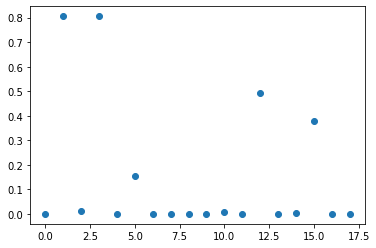

In [ ]:
selector = SelectKBest(f_regression, k=1) # selecting one feature
x_temp = selector.fit_transform(X_train, y_train)

cols = X_train.columns[selector.get_support()]
X_train_trans = pd.DataFrame(x_temp, columns=cols) # final output to use

_ = plt.scatter(range(len(list(selector.pvalues_))), list(selector.pvalues_))

# **1) Linear Regression**

> ### **Strat training the model**

In [ ]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
linreg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

In [ ]:
linreg_model.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
linreg_model.best_params_

{'fit_intercept': True, 'normalize': True}

In [ ]:
linreg_model.score(X_train_trans, y_train)

0.0005572898767391976

In [ ]:
linreg_model.score(X_valid[cols], y_valid)

8.837203972711372e-05

In [ ]:
(mean_squared_log_error(y_valid, linreg_model.predict(X_valid[cols]))*1e6).round(0)

387874.0

> #### **The model is very bad to be used in regression with the current features.**

> ## **Testing model on test_data**

In [ ]:
test_set = pd.read_csv('test_set.csv')

In [ ]:
test_set.rename(columns={'ID':'Id'}, inplace=True)

In [ ]:
test_set.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
test_set.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [ ]:
test_set.duplicated().sum()

0

In [ ]:
test_set_prepared = preprocessing_pipeline(test_set)

In [ ]:
(linreg_model.predict(test_set_prepared[cols])*1e6).round(0)

array([4987159., 4987159., 4987159., ..., 4987159., 4987159., 4987159.])

> #### The prediction to be submitted

---

> ## **Implementation of the algorithm**

In [ ]:
def ssr_gradient(x, y, b):
  res = b[0] + b[1] * x - y
  return res.mean(), (res * x).mean()

def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
  vector = start
  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(x, y, vector))
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
  return vector

def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [ ]:
trial = gradient_descent(ssr_gradient, X_train_trans.iloc[:3000,0], y_train[:3000], [0,0], 0.05, 1000)

In [ ]:
y_pred = trial[0] + trial[1] * X_train_trans.iloc[:3000,0]

R2_score(y_train[:3000], y_pred)

0.0024762012427191893

In [ ]:
y_pred = trial[0] + trial[1] * X_valid.iloc[:3000,0]

R2_score(y_valid[:3000], y_pred)

-139.89359619817154

> #### This implementation takes too much time to run so I took a small sample only of train_set and valid_set.

---

# **2) Multiple Regression**

In [ ]:
X_train = train_set_prepared[train_set_prepared.columns.difference(['Income'])]
y_train = train_set_prepared['Income'].astype('float')

X_valid = valid_set_prepared[valid_set_prepared.columns.difference(['Income'])]
y_valid = valid_set_prepared['Income'].astype('float')

In [ ]:
selector = SelectKBest(f_regression, k=4) # selecting many features
x_temp = selector.fit_transform(X_train, y_train)

cols = X_train.columns[selector.get_support()]
X_train_trans = pd.DataFrame(x_temp, columns=cols) # final output to use

> ### **Strat training the model**

In [ ]:
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
multireg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

In [ ]:
multireg_model.fit(X_train_trans, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
multireg_model.best_params_

{'fit_intercept': True, 'normalize': True}

In [ ]:
multireg_model.score(X_train_trans, y_train)

0.0012226336285940942

In [ ]:
multireg_model.score(X_valid[cols], y_valid)

0.0006818655039995125

In [ ]:
(mean_squared_log_error(y_valid, multireg_model.predict(X_valid[cols]))*1e6).round(0)

387672.0

> #### **Better results and better error score than simple linear regression (error decreased but not too much)**

---

> ## **Testing model on test_data**

In [ ]:
(multireg_model.predict(test_set_prepared[cols])*1e6).round(0)

array([4995634., 4995634., 5110990., ..., 4995634., 5110990., 4885116.])

> #### The prediction to be submitted

---

> ## **Implementation of the algorithm**

In [ ]:
def ssr_gradient(x, y, b):
  res = x.dot(b) - y
  return (np.array(res).T*np.array(x.T)).mean(axis=1).reshape(-1,1)


def gradient_descent(gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06):
  # cost_history = [0] * n_iter
  vector = start
  for itr in range(n_iter):
    diff = -learn_rate * gradient(x, y, vector)
    if np.all(np.abs(diff) <= tolerance):
      break
    vector += diff
    # cost = np.sum(np.square(x.dot(vector) - y))/(2 * len(y))
    # cost_history[itr] = cost
  return vector #, cost_history


def R2_score(y_actual, y_pred):
    SStot = np.sum((y_actual - np.mean(y_actual))**2)
    SSres = np.sum((y_actual - y_pred)**2)
    R2 = 1 - (SSres / SStot)
    return R2

In [ ]:
x = np.matrix(X_train_trans).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.matrix(y_train).T

b = np.matrix(np.zeros(x.shape[1])).T

trial = gradient_descent(ssr_gradient, x, y, b)

In [ ]:
y_pred = x.dot(trial)

In [ ]:
R2_score(np.array(y.tolist()), np.array(y_pred.tolist()))

-0.02860646890520613

In [ ]:
x = np.matrix(X_valid[cols]).astype('float')
x = np.c_[np.ones(len(x)), x]
y = np.matrix(y_valid).T

y_pred = x.dot(trial)
R2_score(np.array(y.tolist()), np.array(y_pred.tolist()))

-0.03585432349404827

> #### **It gave bad results because of initialization values of b**

---

# **3) Polynomial Regression**

In [ ]:
results, errors = [], []

for inter in [True, False]:
  for deg in [2, 4, 6, 8]:
    
    polyf = PolynomialFeatures(degree=deg, interaction_only=inter)
    x_tempo = polyf.fit_transform(X_train_trans)

    parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}
    polyreg_model = GridSearchCV(LinearRegression(), parameters, scoring='r2')

    polyreg_model.fit(x_tempo, y_train)
    x_val_tempo = polyf.transform(X_valid[cols])
    error = (mean_squared_log_error(y_valid, polyreg_model.predict(x_val_tempo))*1e6).round(0)

    results.append((inter, deg, polyreg_model.best_params_))
    errors.append(error)

In [ ]:
target_index = errors.index(min(errors))
print(results[target_index], errors[target_index])

(False, 8, {'fit_intercept': False, 'normalize': True}) 387433.0


> ### **Strat training the model**

In [ ]:
polyfinal = PolynomialFeatures(degree=8, interaction_only=False)
x_tempo = polyfinal.fit_transform(X_train_trans)
polyreg_model_final = LinearRegression(False, True)
polyreg_model_final.fit(x_tempo, y_train)
x_val_tempo = polyfinal.transform(X_valid[cols])

print((mean_squared_log_error(y_valid, polyreg_model_final.predict(x_val_tempo))*1e6).round(0))

387433.0


> #### **Tried various parameters to get the lowest error. It slightly decreased by polynomial regression compared to multiple regression.**

---

> ## **Testing model on test_data**

In [ ]:
x_test_tempo = polyfinal.transform(test_set_prepared[cols])
(polyreg_model_final.predict(x_test_tempo)*1e6).round(0)

array([4991211., 4991211., 5122803., ..., 4991211., 5122803., 4951416.])

> #### The prediction to be submitted

---

# **4) Support Vector Regressor**

> ### **Strat training the model**

In [ ]:
parameters = {'kernel': ['rbf', 'linear', 'poly'], 'gamma': ['auto', 'scale'], 'degree': [2, 3, 4], 'C': [1, 10]}
svr_model = GridSearchCV(SVR(), parameters, scoring='r2')

In [ ]:
svr_model.fit(X_train_trans.iloc[:5000,:], y_train[:5000])

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'degree': [2, 3, 4],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
svr_model.best_params_

{'C': 1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}

In [ ]:
svr_model.score(X_train_trans.iloc[:5000,:], y_train[:5000])

0.002131937474346035

In [ ]:
svr_model.score(X_valid[cols].iloc[:1000,:], y_valid[:1000])

-0.010904878112071081

In [ ]:
(mean_squared_log_error(y_valid[:1000], svr_model.predict(X_valid[cols].iloc[:1000,:]))*1e6).round(0)

428906.0

> #### **The model takes too much time to run so I used a small sample of data to run and it gave bad results due to this approach as the error increased.**

---

> ## **Testing model on test_data**

In [ ]:
(svr_model.predict(test_set_prepared[cols])*1e6).round(0)

array([5074753., 5074753., 5503910., ..., 5074753., 5503910., 5158315.])

> #### The prediction to be submitted

---

> ## **Polynomial Regression is the best models according to error value and SVR is the worst but all is bad according to accuracy or for regression overall.**